# **OBJECTIVE :** 
"To utilize time series analysis techniques to gain insights into the temporal patterns and trends of restaurant visitors, with the aim of optimizing operational efficiency, forecasting future demand, and enhancing customer experience."

# Import Library and Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.stattools import kpss,adfuller
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
rv=pd.read_csv(r"C:\Users\LENOVO\Downloads\RestaurantVisitors.csv",index_col='date',parse_dates=True)

# About Dataset
About Dataset:\
This dataset provides visitors of multiple restaurants from January 2016 to April 2017 . .Analysts often employ various statistical techniques, such as decomposition, smoothing, and forecasting models, to analyze patterns, trends, and seasonal fluctuations within the data.The dataset serves as a valuable resource for researchers, practitioners, and students in the fields of statistics, econometrics, and planning.

In [5]:
rv.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1.0,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0.0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0.0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0.0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0.0,na,2.0,15.0,38.0,43.0,98.0


# DATA PRE-PROCESSING 

In [6]:
rv=rv.dropna()
rv.isnull().sum()     

weekday         0
holiday         0
holiday_name    0
rest1           0
rest2           0
rest3           0
rest4           0
total           0
dtype: int64

# Exploratory Data Analysis (EDA)

In [7]:
rv

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1.0,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0.0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0.0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0.0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0.0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...
2017-04-18,Tuesday,0.0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0.0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0.0,na,22.0,3.0,19.0,46.0,90.0


**From above dataframe we can see that holiday have great impact on total numbers of visitors**

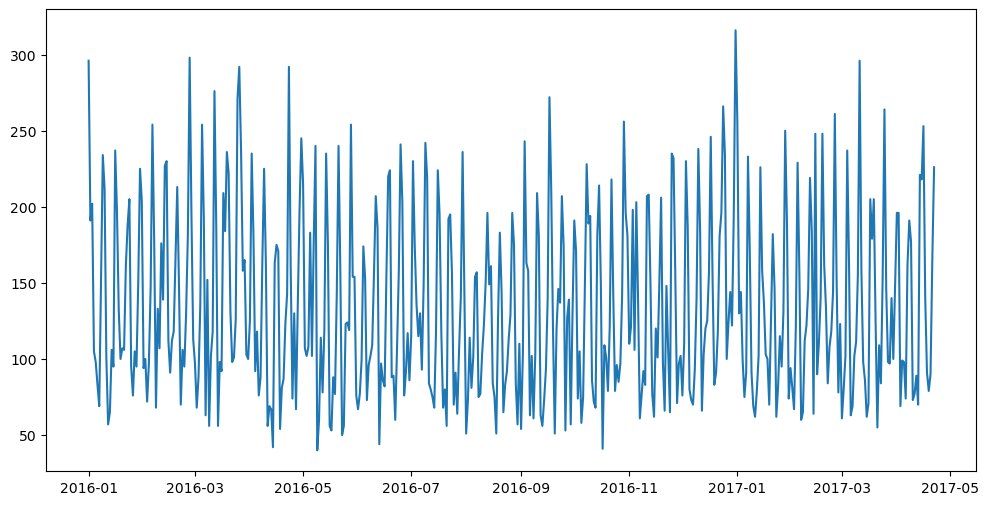

In [8]:
plt.figure(figsize=(12,6))
plt.plot(rv.total);

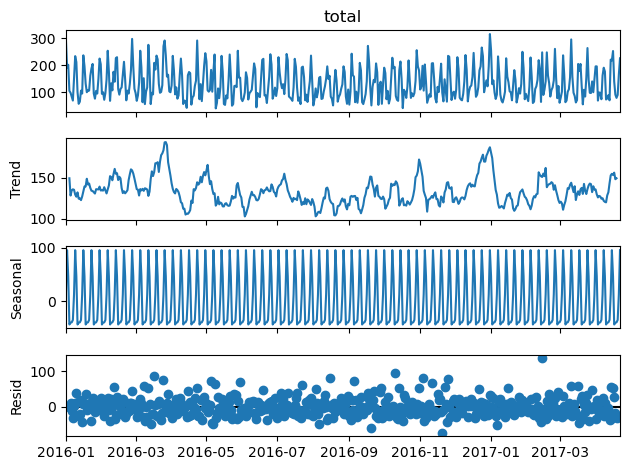

In [9]:
dec=seasonal_decompose(rv.total)
dec.plot();

**To Check the Stationality of Data we will use both ADF Fuller test and KPSS test for better results and understanding** 

In [10]:
def ad(series):
    from statsmodels.tsa.stattools import adfuller
    pvalue=adfuller(series)[1]
    if pvalue<.05:
        print("ho is series is NOT stationary")
        print("pvalue is",pvalue)
        print('since pvalue is less than .05 reject the null')
        print('conclusion is series is STATIONARY')
    else:
        print("ho is series is NOT stationary")
        print("pvalue is ",pvalue)
        print('since pvalue is more than .05 then we failed to reject the null')
        print('conclusion is series is NOT STATIONARY')

In [11]:
def kp(series):
    from statsmodels.tsa.stattools import kpss
    pvalue=kpss(series)[1]
    if pvalue<.05:
        print("ho is series is stationary")
        print("pvalue is",pvalue)
        print('since pvalue is less than .05 reject the null')
        print('conclusion is series is NOt STATIONARY')
    else:
        print("ho is series is stationary")
        print("pvalue is ",pvalue)
        print('since pvalue is more than .05 then we failed to reject the null')
        print('conclusion is series is STATIONARY')

In [12]:
kp(rv.total)

ho is series is stationary
pvalue is  0.1
since pvalue is more than .05 then we failed to reject the null
conclusion is series is STATIONARY


In [13]:
ad(rv.total)

ho is series is NOT stationary
pvalue is 1.319377094694154e-06
since pvalue is less than .05 reject the null
conclusion is series is STATIONARY


**Dataset is stationary** 

**From the above Plots and doing Exploratory data analysis we came to know that data is stationary as well as seasonal.\
Above Insights from the data help us  to get important patterns and parameters which will be useful while building model.**

# SEQUENCIAL SAMPLING
Sequential sampling offers flexibility, adaptability,efficiency and manage resources effectively in dynamic environments characterized by evolving data over time.

In [15]:
rv_train=rv.iloc[0:450]
rv_test=rv.iloc[450::]  

# Model Building

**We will use auto_arima model for finding optimal parameters for Sarimax model i.e.auto-regressive term,integrated term and moving average term(P,D,Q)**

In [17]:
auto_arima(rv_train['total'],seasonal=True,m=7,exog=rv_train[['holiday']])#

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

**We will use Sarimax model as  SARIMAX allows to include exogenous variables in the model which allows us for capturing additional information beyond the time series itself which may have considerable significance.Hence, potentially improving the accuracy of forecasts**

In [18]:
model_sarimax_rv=SARIMAX(rv_train.total,order=(1,0 , 0),seasonal_order=(1,0,1,7),exog=rv_train[['holiday']])

In [19]:
result_sarimax=model_sarimax_rv.fit()

# Predictions 
forecasting  for test datasets

In [22]:
pred_sarimax=np.round(result_sarimax.predict(start=450,end=477,exog=rv_test[['holiday']]))
pred_sarimax

2017-03-26    176.0
2017-03-27     82.0
2017-03-28     93.0
2017-03-29     95.0
2017-03-30     92.0
2017-03-31    139.0
2017-04-01    229.0
2017-04-02    169.0
2017-04-03     81.0
2017-04-04     93.0
2017-04-05     95.0
2017-04-06     92.0
2017-04-07    139.0
2017-04-08    229.0
2017-04-09    169.0
2017-04-10     81.0
2017-04-11     93.0
2017-04-12     95.0
2017-04-13     92.0
2017-04-14    208.0
2017-04-15    229.0
2017-04-16    238.0
2017-04-17    149.0
2017-04-18     93.0
2017-04-19     95.0
2017-04-20     92.0
2017-04-21    139.0
2017-04-22    229.0
Freq: D, Name: predicted_mean, dtype: float64

# Model Performance 

In [23]:
rv_test['pred_sarimax']=pred_sarimax
rv_test['err_sarimax']=rv_test.total-pred_sarimax
rv_test

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total,pred_sarimax,err_sarimax
date,,,,,,,,,,
2017-03-26,Sunday,0.0,na,33.0,27.0,48.0,38.0,146.0,176.0,-30.0
2017-03-27,Monday,0.0,na,26.0,31.0,34.0,7.0,98.0,82.0,16.0
2017-03-28,Tuesday,0.0,na,21.0,25.0,20.0,31.0,97.0,93.0,4.0
2017-03-29,Wednesday,0.0,na,39.0,40.0,22.0,39.0,140.0,95.0,45.0
2017-03-30,Thursday,0.0,na,36.0,22.0,13.0,29.0,100.0,92.0,8.0
2017-03-31,Friday,0.0,na,49.0,52.0,28.0,20.0,149.0,139.0,10.0
2017-04-01,Saturday,0.0,na,67.0,31.0,36.0,62.0,196.0,229.0,-33.0
2017-04-02,Sunday,0.0,na,69.0,21.0,55.0,51.0,196.0,169.0,27.0
2017-04-03,Monday,0.0,na,24.0,2.0,29.0,14.0,69.0,81.0,-12.0


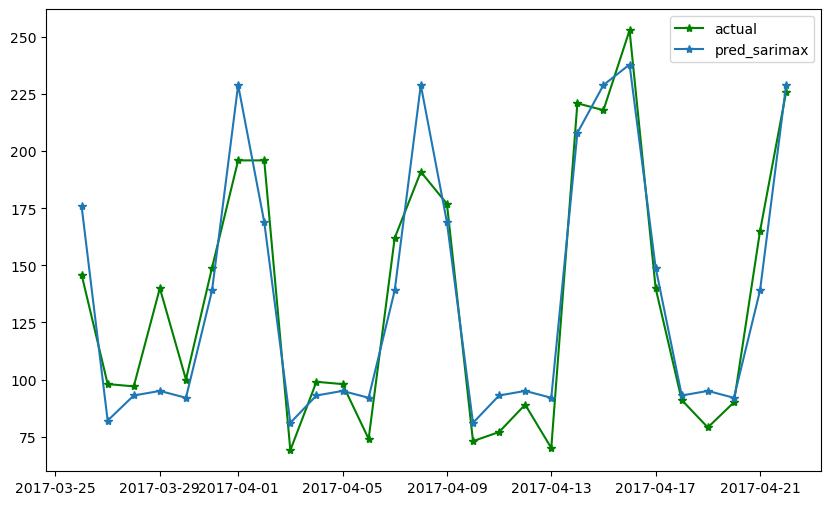

In [28]:
mape_sarimax=np.mean(np.abs(rv_test['err_sarimax']*100/rv_test.total))
mape_sarimax
plt.figure(figsize=(10,6))
plt.plot(rv_test.total,color='green',label='actual',marker='*')
plt.plot(rv_test.pred_sarimax,label='pred_sarimax',marker="*")
plt.legend()

In [29]:
mape_sarimax=np.mean(np.abs(rv_test['err_sarimax']*100/rv_test.total))
mape_sarimax

12.245245287470576

**The analysis has yielded promising results, with the model achieving a Mean Absolute Percentage Error (MAPE) of 12.24 % which is well within the accepted tolerance limit. This performance demonstrates the effectiveness of the forecasting approach utilized in this study**

**Prediction for 22/4/2017 to 12/5/2017**

In [26]:
model_sarimax_rv=SARIMAX(rv.total,order=(1,0 , 0),seasonal_order=(1,0,1,7),exog=rv[['holiday']])
result_sarimax=model_sarimax_rv.fit()
pred_sarimax1=np.round(result_sarimax.predict(start=477,end=497,exog=rv.holiday[457:477]))
pred_sarimax1


2017-04-22    230.0
2017-04-23    170.0
2017-04-24     80.0
2017-04-25     92.0
2017-04-26     96.0
2017-04-27     91.0
2017-04-28    142.0
2017-04-29    225.0
2017-04-30    170.0
2017-05-01     80.0
2017-05-02     92.0
2017-05-03     96.0
2017-05-04     91.0
2017-05-05    212.0
2017-05-06    225.0
2017-05-07    241.0
2017-05-08    150.0
2017-05-09     92.0
2017-05-10     96.0
2017-05-11     91.0
2017-05-12    142.0
Freq: D, Name: predicted_mean, dtype: float64

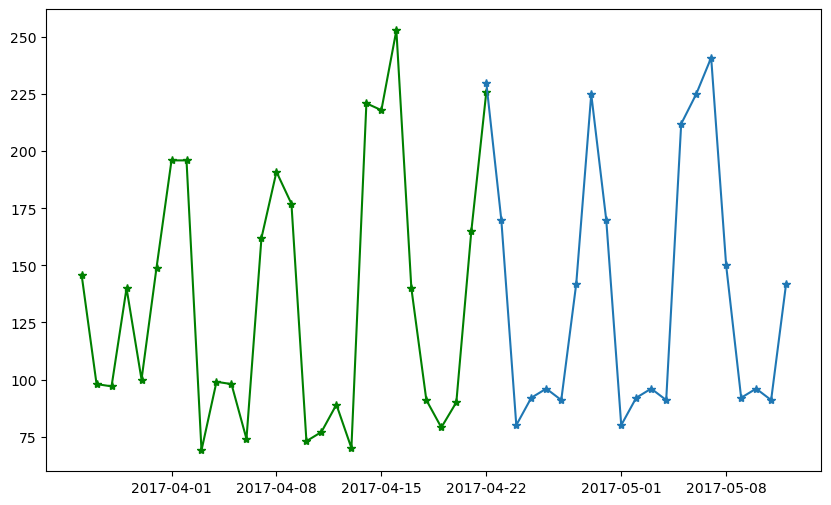

In [27]:
plt.figure(figsize=(10,6))
plt.plot(rv_test.total,color='green',label='actual',marker='*')
plt.plot(pred_sarimax1,label='pred_sarima',marker="*")

# CONCLUSION:
The time series analysis conducted on restaurant visitor data offers valuable insights into the temporal patterns and trends of customer traffic. By applying sophisticated statistical techniques, such as seasonal decomposition, trend analysis, and forecasting models, we gain a deeper understanding of the underlying dynamics driving restaurant visitation